# ***Project Title: PRCP-1022-HospitalStayPred***

#### Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a machine learning model to predict the length of stay (in days) of a patient entering the Hospital, given various factors about their stay.


# Features:

case_id: Unique identifier for each hospital admission record.

Hospital_code: Code representing the specific hospital.

Hospital_type_code: Code indicating the type of hospital (e.g., a, b, c, etc.).

City_Code_Hospital: Code representing the city where the hospital is located.

Hospital_region_code: Code for the region in which the hospital is situated (e.g., X, Y, Z).

Available_Extra_Rooms_in_Hospital: Number of extra rooms available in the hospital at the time of admission.

Department: Department where the patient is being treated (e.g., radiotherapy, anesthesia, gynecology).

Ward_Type: Type of hospital ward (e.g., R, S, Q, etc.).

Ward_Facility_Code: Code representing facilities available in the ward (e.g., A, B, C).

Bed_Grade: Grade or quality rating of the bed assigned to the patient.

patientid: Unique identifier for each patient.

City_Code_Patient: Code representing the patient’s city of residence.

Type_of_Admission: Type of hospital admission (e.g., Emergency, Trauma, Urgent).

Severity_of_Illness: Severity of the patient’s condition (e.g., Minor, Moderate, Extreme).

Visitors_with_Patient: Number of visitors accompanying the patient.

Age: Age range of the patient (e.g., 0-10, 21-30, 51-60).

Admission_Deposit: Deposit amount paid at the time of admission.

Stay: Target variable representing the length of hospital stay (e.g., 0-10 days, 11-20 days, etc.).

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 1: Load the Dataset

In [2]:
health_df = pd.read_csv('HealthCareAnalytics.csv')

In [3]:
#Read the data
health_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
#shape od dats
health_df.shape

(318438, 18)

In [5]:
#data types
health_df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

# Data Cleaning

In [6]:
health_df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [7]:
#To check data type and  null value of all columns 
health_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [8]:
# it will give you the info about numerical data
health_df.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available_Extra_Rooms_in_Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed_Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors_with_Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


In [9]:
# It will give you the info about categorical data
health_df.describe(include="O")

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [10]:
# Check missing values
health_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

There are missing values in Bed_Grade and City_Code_Patient which need to be analysed

In [11]:
#Missing values imputation with mean
health_df['Bed_Grade'].fillna(health_df['Bed_Grade'].median(), inplace=True)
health_df['City_Code_Patient'].fillna(health_df['City_Code_Patient'].median(), inplace=True)

In [12]:
health_df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

# EDA

# Univariate Analysis

Categorical Data:-

Hospital_type_code,Hospital_region_code,Department,Ward_Type,Wad_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay

Numerical Data:-

case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit

In [13]:
Numerical_data=health_df[["case_id","Hospital_code","City_Code_Hospital","Available_Extra_Rooms_in_Hospital","patientid","Visitors_with_Patient","Admission_Deposit",
         "City_Code_Patient"]]
categorical_data=health_df[["Hospital_type_code","Hospital_region_code","Department","Ward_Type","Ward_Facility_Code","Type_of_Admission","Severity_of_Illness",
           "Age","Stay","Bed_Grade"]]

In [14]:
import sweetviz as sv
my_report=sv.analyze(health_df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Numerical Data

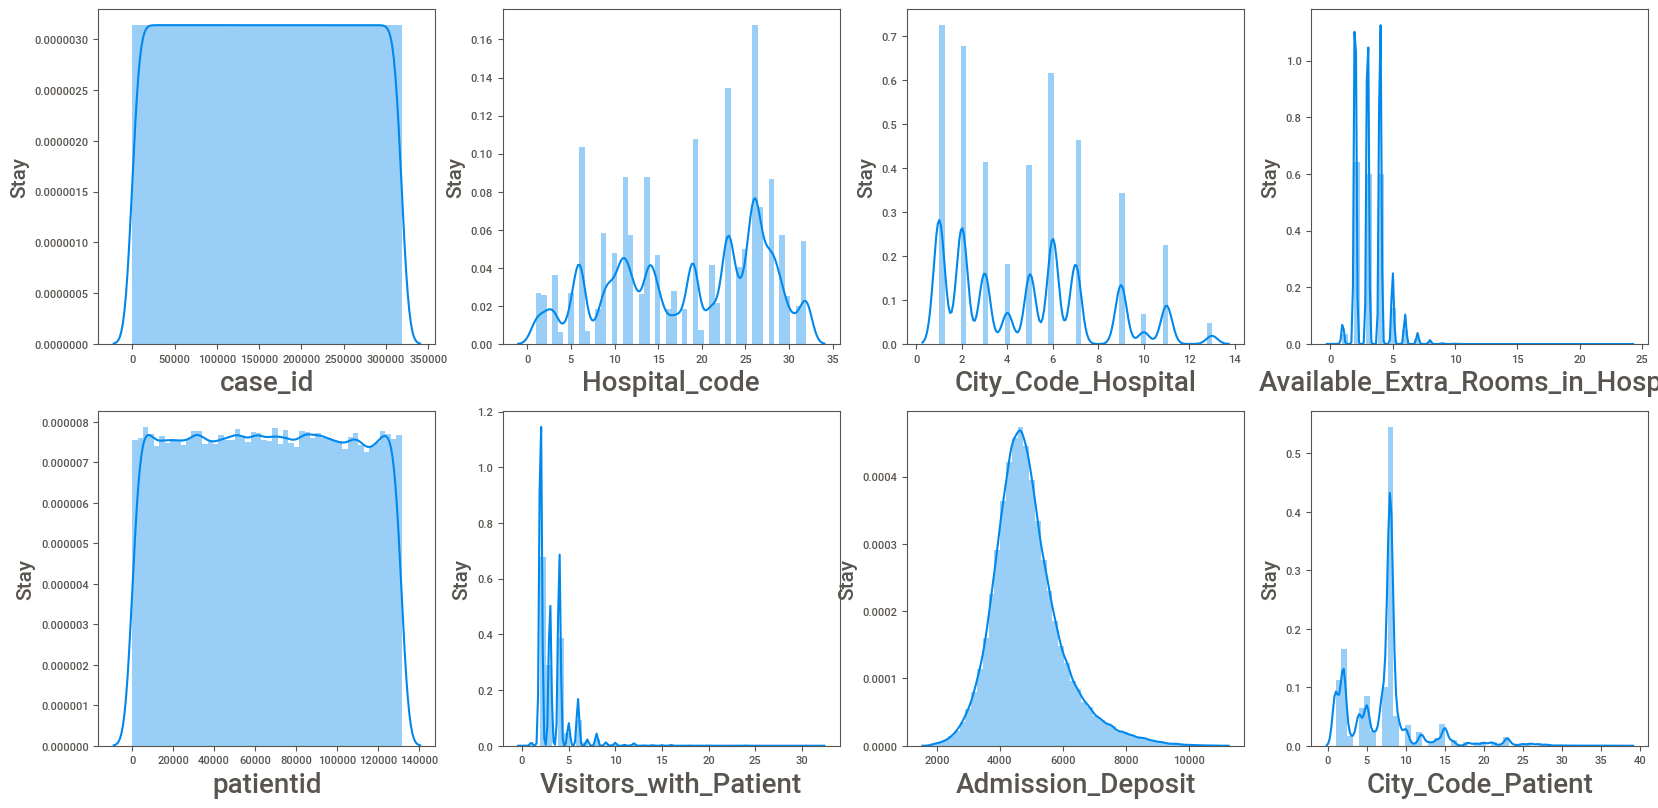

In [15]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for columns in Numerical_data:
    sb=plt.subplot(4,4,plotnumber)
    sns.distplot(x=Numerical_data[columns])
    plt.xlabel(columns,fontsize=20)
    plt.ylabel("Stay",fontsize=15)
    plotnumber+=1
plt.tight_layout(pad=100)

* Distplot is used for distribution of continous data.


* **Case Id**:-From the above graphs we can tell that case_id is uniform and there is no variation in that columns.


* **patientid**:-From the above displot we can tell that patientid is uniform there is no variation in that columns


* **Admission_deposit**:-From the above displot we can tell that aadmission_deposit shows normal distribution.


* **Hospital_code**:-From the above displot we can tell that it is skewed.


* **city_code_hospital**:-From the above displot we can tell that it is skewed.


* **Available_extra_rooms_in_hosp**:-From the above displot we can tell that it is skewed.


* **visitors_with_patient**:-From the above displot we can tell that the graph is skewed.


* **city_code_patient**:-From the above displot we can tell that it is skewed.

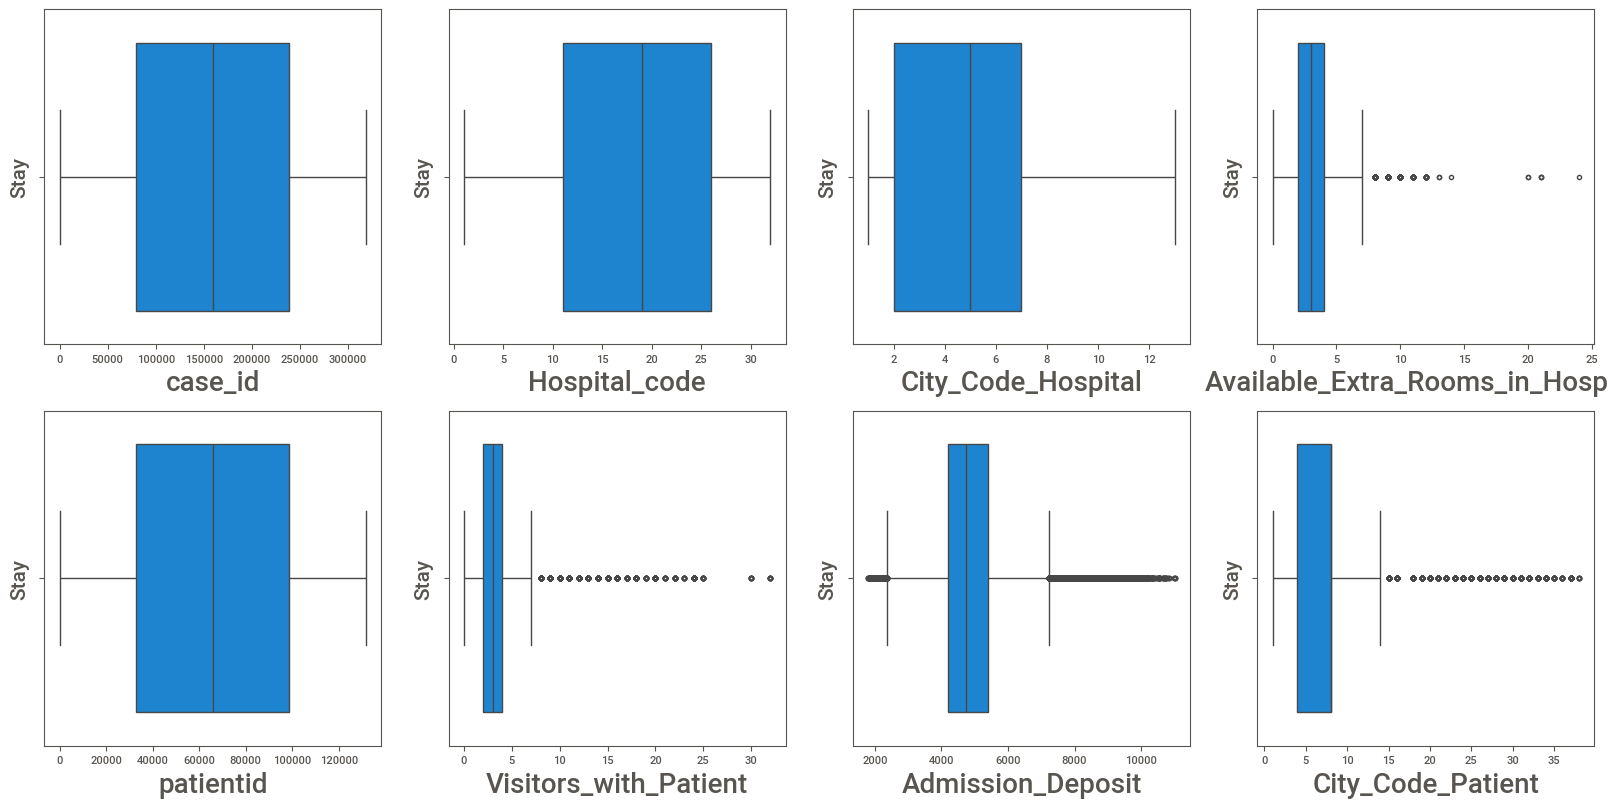

In [16]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for columns in Numerical_data:
    sb=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=Numerical_data[columns])
    plt.xlabel(columns,fontsize=20)
    plt.ylabel("Stay",fontsize=15)
    plotnumber+=1
plt.tight_layout(pad=100)

* Boxplot is used for disrtibution of numerical data.


* **Case Id**:-boxplot for case_id has no outliers, this indicates that all data points for that variable fall within a        relatively tight range, suggesting uniformity and consistency in the data distribution for that feature.


* **patientid**:-boxplot for this column reveals no outliers, this indicates that all data points for that variable fall within a relatively tight range, suggesting uniformity and consistency in the data distribution for that feature.


* **Admission_deposit**:-From the above boxplot the parameter has no outliers,data is close together and there aren't any values that stand out as being much higher or lower than the rest


* **Hospital_code**:-the boxplot shows that all the data points are close together and none are unusually high or low and has no ouliers.


* **city_code_hospital**:-In this column's boxplot, every data point fits neatly within the expected range, with no unusually high or low values that has no outliers.


* **Available_extra_rooms_in_hosp**:-From the above boxplot this column consists of outlier.


* **visitors_with_patient**:-From the above boxplot this parameter has outlier.


* **city_code_patient**:From the above boxplot this parameter has outlier.

### Categorical Data

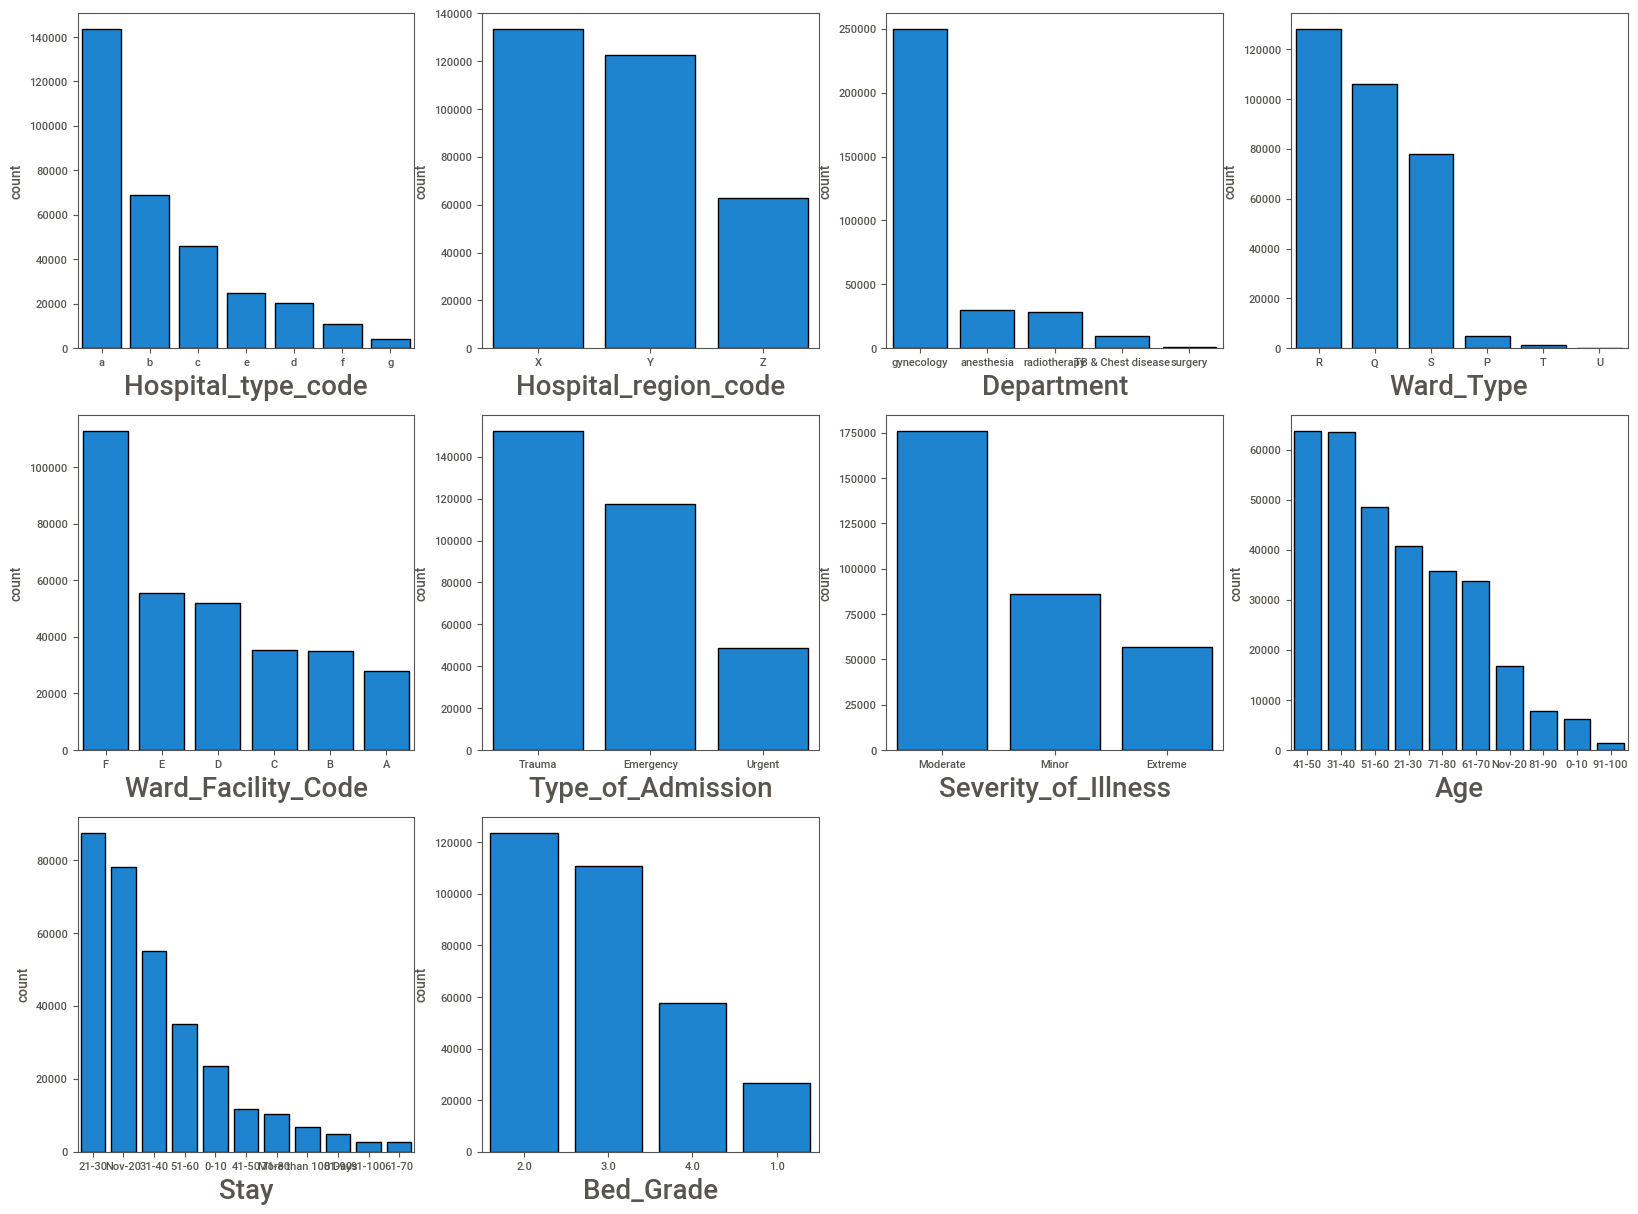

In [17]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for columns in categorical_data:
    sb=plt.subplot(4,4,plotnumber)
    sns.countplot(x=categorical_data[columns],order=categorical_data[columns].value_counts().index,ec='black')
    plt.xlabel(columns,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=100)

### Insights
* countplot is used for distribution of categorical data.


* **Hospital_type_code**:- In the above countplot there are 6 unique parameters then "a" column has highest count and "g" has lowest count.


* **Hospital_region_code**:-In the above countplot there are 3 unique parameters then "x" column has highest count and "z" has lowest count.


* **Department**:-In the above countplot there are 5 unique parameters then "gynecology" column has highest count and "disease surgery" has lowest count.


* **Ward_type**:-In the above countplot there are 6 unique parameters then "R" column has highest count and "U" has lowest count.


* **Ward_Facility_Code**:-In the above countplot there are 6 unique parameters then "F" column has highest count and "A" has lowest count.


* **Type_of_Admission**:-In the above countplot there are 3 unique parameters then "TRAUMA" column has highest count and "URGENT" has lowest count.


* **Severity_of_illness**:-In the above countplot there are 3 unique parameters then "Moderate" column has highest count and "Extreme" has lowest count.


* **Age**:- In the above countplot there are 10 unique parameters then "41-50" column has highest count and "91-100" has lowest count.


* **Stay**:- In the above countplot there are 10 unique parameters then "21-30" column has more than 8000 range and "61-70" column has lowest range.


* **Bed_Grade**:- In the above countplot there are 4 unique parameters then "20" column has highest count in a range of 120000 and "10" has lowest count.

# Biaveriate Analysis

### Hospital_type_code and stay

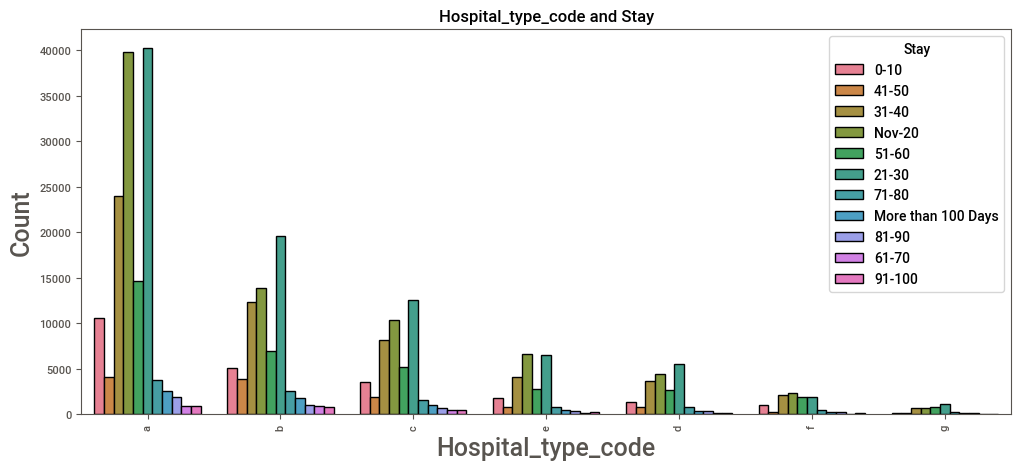

In [18]:
data=health_df
plt.figure(figsize=(12,5))
sns.countplot(x="Hospital_type_code",data=data,hue=data["Stay"],order=data["Hospital_type_code"].value_counts().index,ec="black")
plt.title("Hospital_type_code and Stay",color='black')
plt.xlabel("Hospital_type_code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights

* In Hospital_type_code 'A' is most preffered for staying
* In a importent with patient will stay up to 21-30 and 20 days 
* But 'G' has least staying vlaue 

### Hospital_region_code and Stay

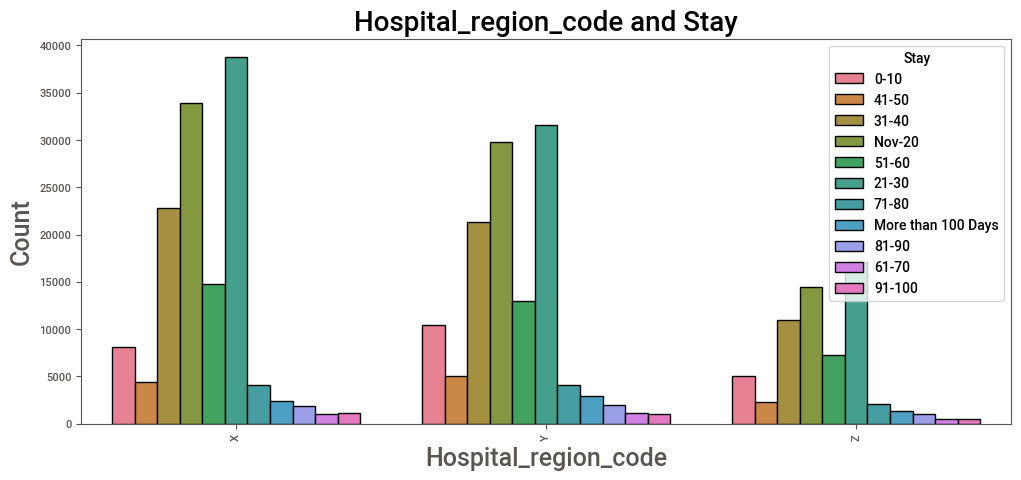

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x="Hospital_region_code",data=data,hue=data["Stay"],order=data["Hospital_region_code"].value_counts().index,ec="black")
plt.title("Hospital_region_code and Stay", fontsize=20, color='black')
plt.xlabel("Hospital_region_code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights

* Above plot showing Hospital_region_code in 3 unique value is there x,y,z 
* In X most of patient will stay up to 71-80 days totaly 38000 near and and least 61-70 days totaly 2000 
* In Y most of patient will stay up to 71-80 totaly 30000 patients and least 61-70 days 2000 patient

### Department and Stay

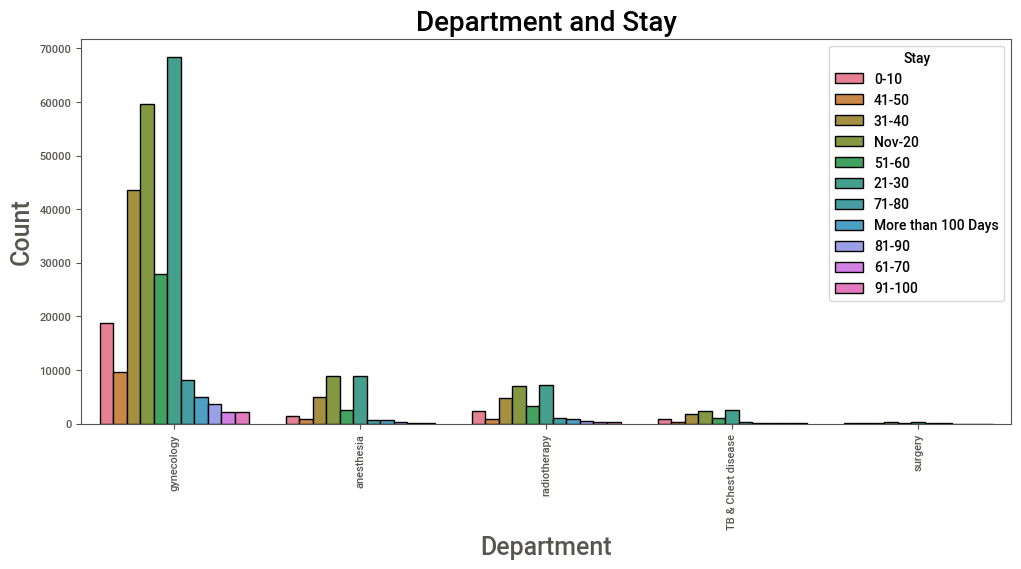

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x="Department",data=data,hue=data["Stay"],order=data["Department"].value_counts().index,ec="black")
plt.title("Department and Stay", fontsize=20, color='black')
plt.xlabel("Department",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* Above visualization we got 'gynecology' has highest count 68000 patients will saty 21-30  days fallowed by 'anesthesia'
* Lowest is 'surgery',surgery patients are very less counts means less then 100 patient will stay

### Ward_Type and Stay

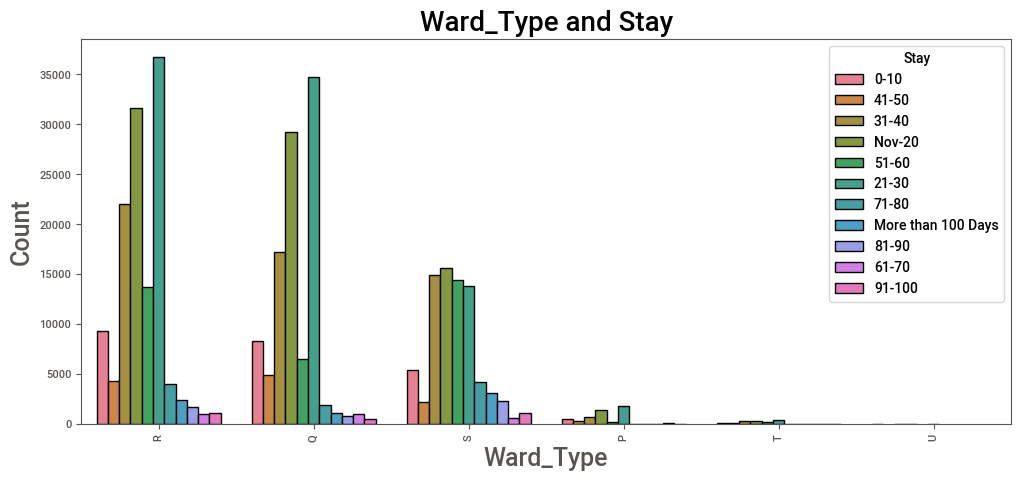

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x="Ward_Type",data=data,hue=data["Stay"],order=data["Ward_Type"].value_counts().index,ec="black")
plt.title("Ward_Type and Stay", fontsize=20, color='black')
plt.xlabel("Ward_Type",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights

* We have 6 type of Wards in that 'R' has highest patients stays in that maximum 21-30 days above 35000 patients will stay fallowed by 'Q'
* least count is 'U' ward, it has very less patient stay means 100  

### Ward_Facility_Code and Stay

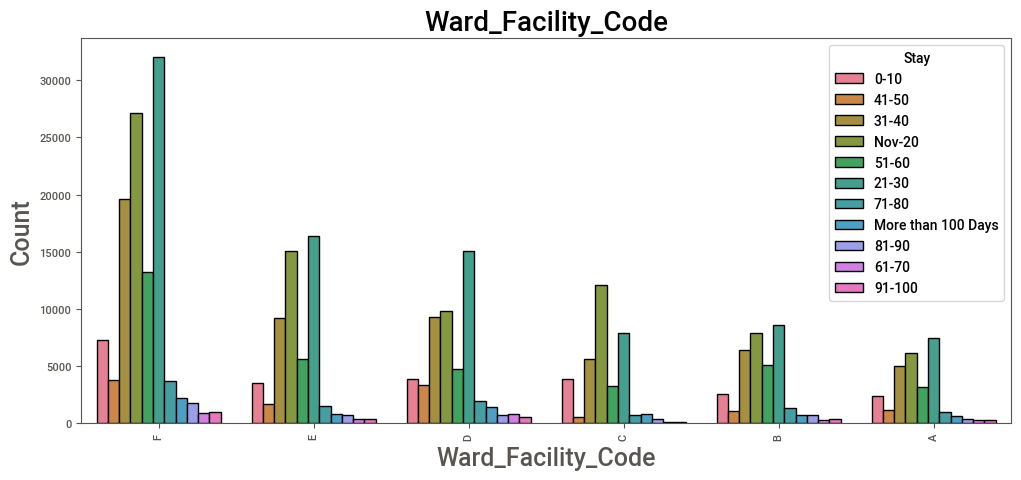

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x="Ward_Facility_Code",data=data,hue=data["Stay"],order=data["Ward_Facility_Code"].value_counts().index,ec="black")
plt.title("Ward_Facility_Code", fontsize=20, color='black')
plt.xlabel("Ward_Facility_Code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* In ward_Facility_code there are 6 values in taht 'F' has highest and above 35000 patients will stay 21-30 days fallowed by 'E'
* least count is 'A' that has only 5000 patient will stay 21-30 days

### Type_of_Admission and Stay

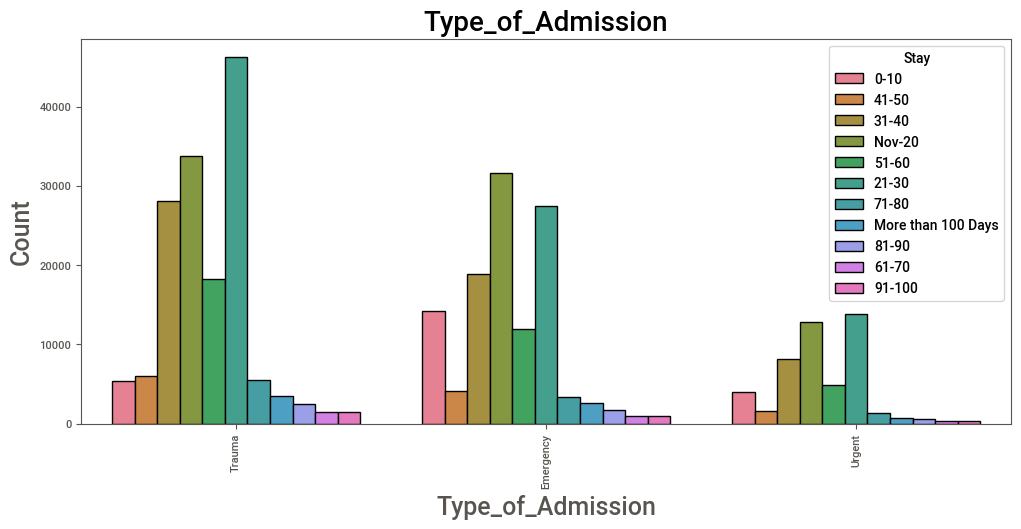

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x="Type_of_Admission",data=data,hue=data["Stay"],order=data["Type_of_Admission"].value_counts().index,ec="black")
plt.title("Type_of_Admission", fontsize=20, color='black')
plt.xlabel("Type_of_Admission",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* In Type_of_Admission has 3 unique value 'Trauma','Emergency' and 'urgent'
* highest patient will stay in Trauma with different days ,in that 21-30 is highest patient
* Followed by 'Emergency'
* least Admission is 'Urgent'

### Severity_of_Illness and Stay

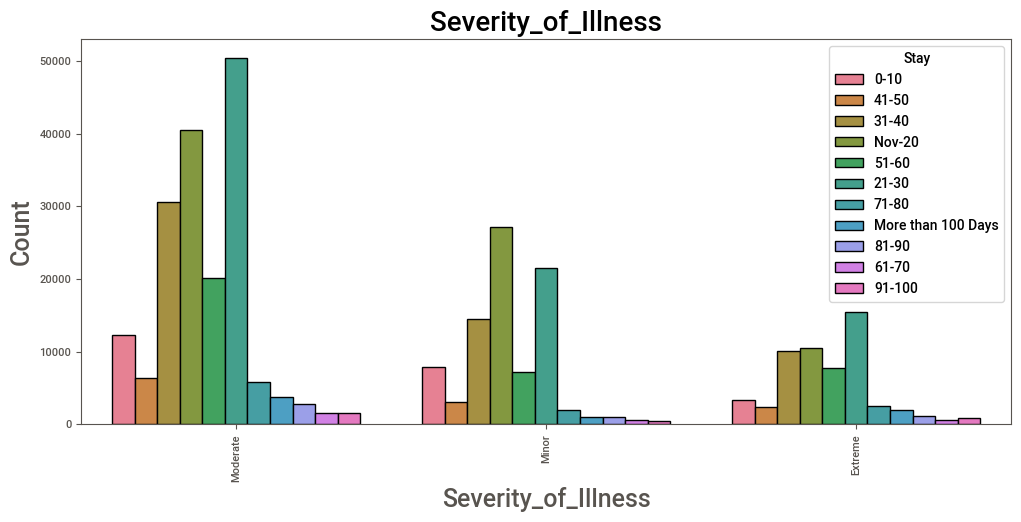

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(x="Severity_of_Illness",data=data,hue=data["Stay"],order=data["Severity_of_Illness"].value_counts().index,ec="black")
plt.title("Severity_of_Illness", fontsize=20, color='black')
plt.xlabel("Severity_of_Illness",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* 'Severity_of_illness' has 3 unique value ,'Moderate','Minor','Extreme'
*  In that 'Moderate' has highest patients will stay within 21-30 days counts is 50000
* Least count is 'Excreme' with only 21-30 days 15000 patients will saty

### Age and stay

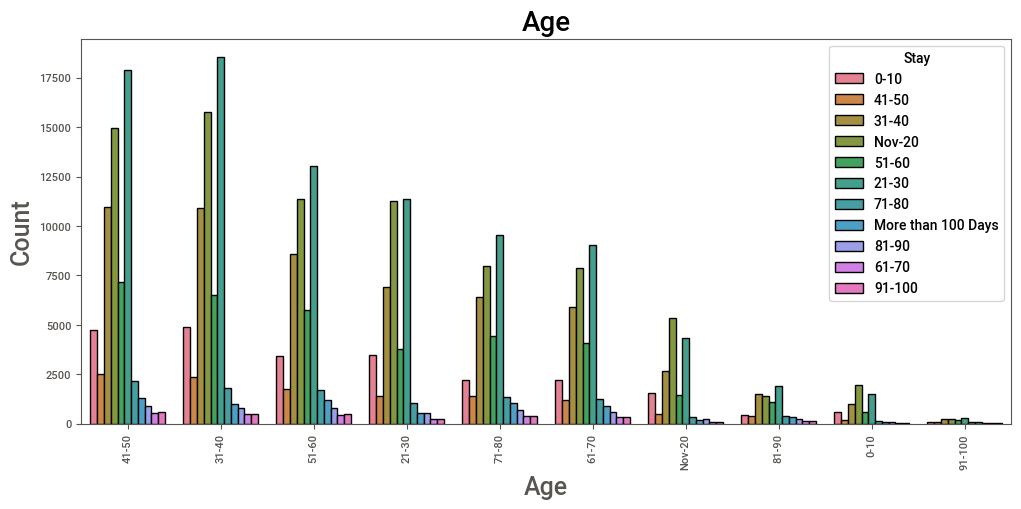

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x="Age",data=data,hue=data["Stay"],order=data["Age"].value_counts().index,ec="black")
plt.title("Age", fontsize=20, color='black')
plt.xlabel("Age",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* Patient has different Age in that 41-50 ages 17500 patient will stay within 21-30 days Followed by 31-40 ages
* Age 91-100 patient has less count 

### Bed_Grade and Stay

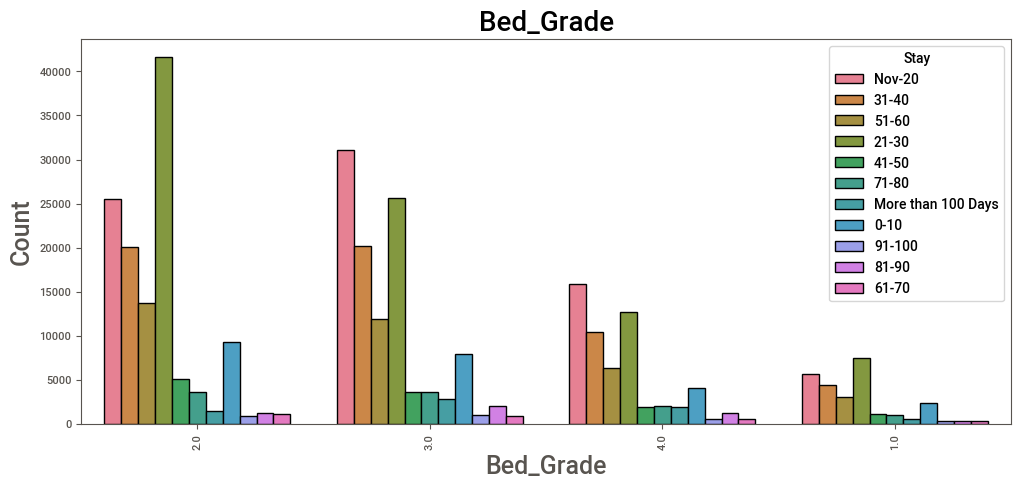

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x="Bed_Grade",data=data,hue=data["Stay"],order=data["Bed_Grade"].value_counts().index,ec="black")
plt.title("Bed_Grade", fontsize=20, color='black')
plt.xlabel("Bed_Grade",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

### Insights
* The count plot illustrates the distribution of patients' stays across different bed grades. It appears that certain bed grades are more commonly associated with longer stays than others. By observing the height of the bars for each bed grade category, we can discern the relative frequency of different stay durations within each grade. This insight could potentially inform hospital management decisions, such as resource allocation or patient prioritization strategies, based on bed grade assignments. Additionally, the ordering of bed grades provides insight into their popularity or utilization within the hospital, with the most frequently assigned grades appearing first.

# Feature Engineering 

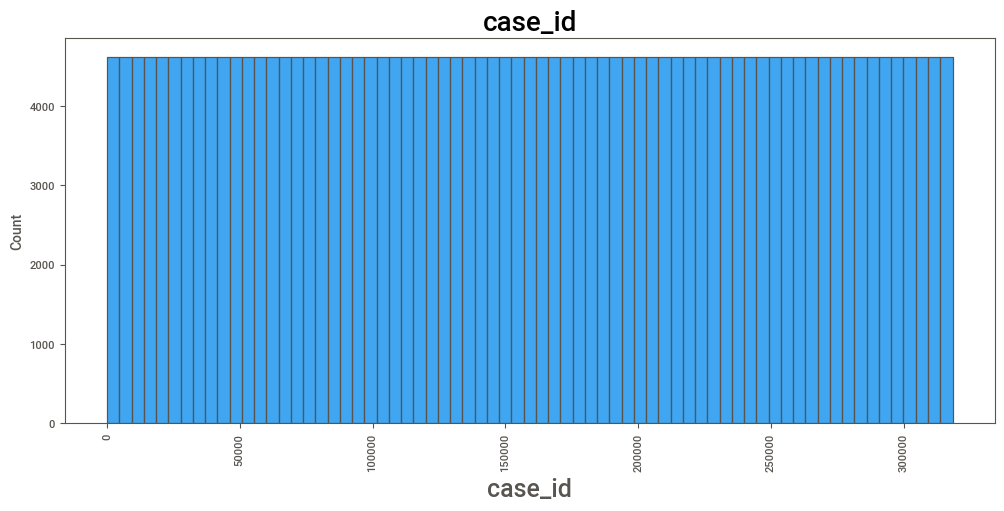

In [27]:
# case id
plt.figure(figsize=(12,5))
sns.histplot(x="case_id",data=data)
plt.title("case_id", fontsize=20, color='black')
plt.xlabel("case_id",fontsize=18)
plt.xticks(rotation=90)
plt.show()

* case_id contain uniform distribution
* it is not much usefull our model 
* we going to drop this column

In [28]:
data.drop('case_id',axis=1,inplace=True)

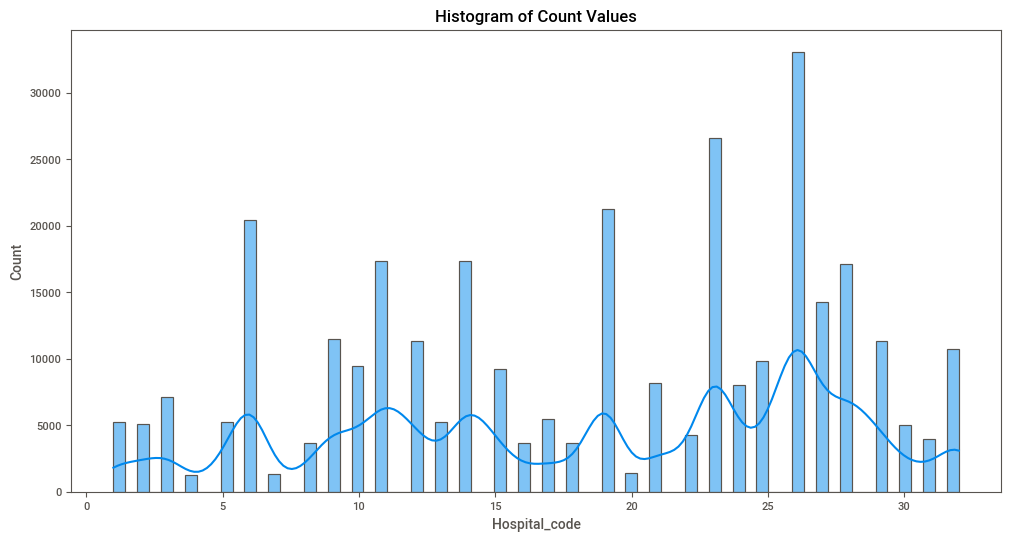

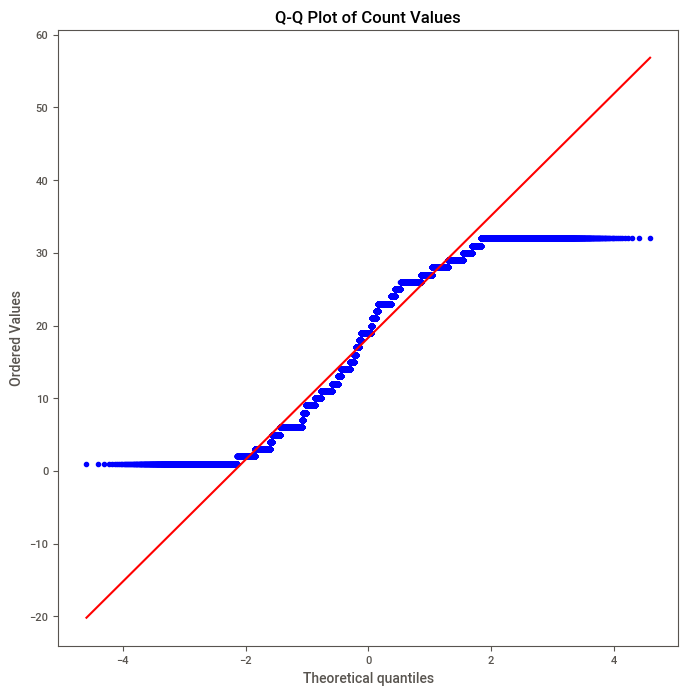

In [29]:
#Hospital_code
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Hospital_code'], kde=True)
plt.title('Histogram of Count Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['Hospital_code'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

* Hospital_code has skewed data
* we have to convert it into normal distribution

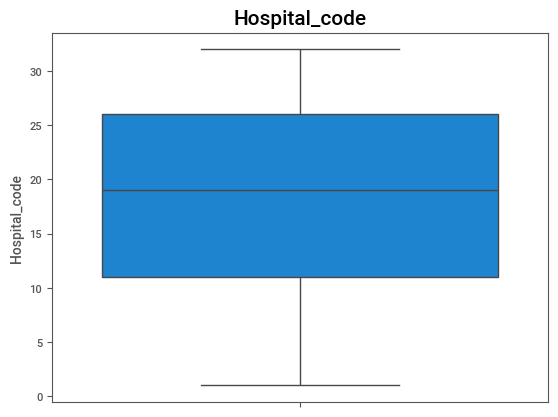

In [30]:
#check for outliers
sns.boxplot(data['Hospital_code'])
plt.title('Hospital_code',fontsize=15)
plt.show()

In [31]:
## Hospital_type_code
# Replacing data to numerical
data['Hospital_type_code'].replace({'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7},inplace=True)

In [32]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,3,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,3,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,5,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,2,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,2,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,24,1,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,7,1,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,11,2,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


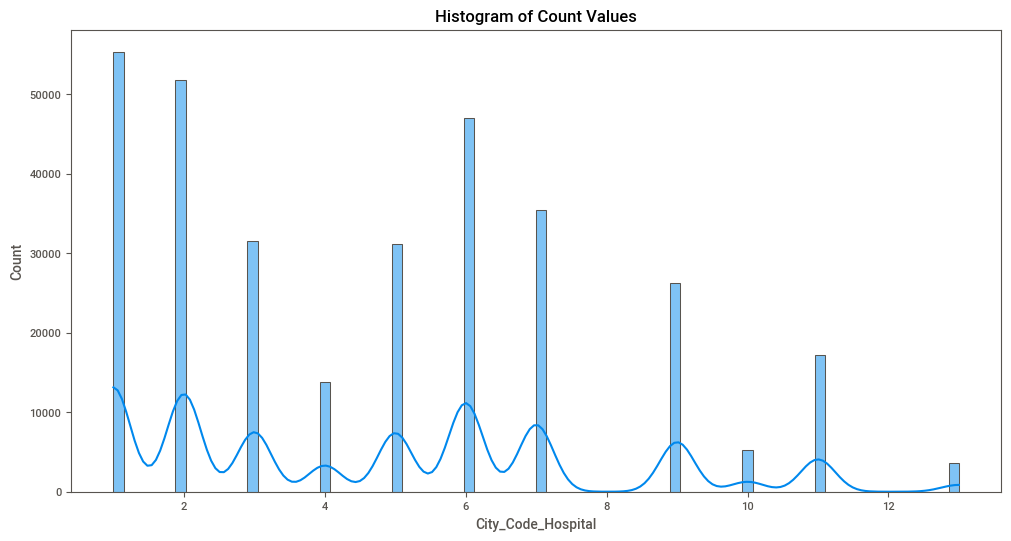

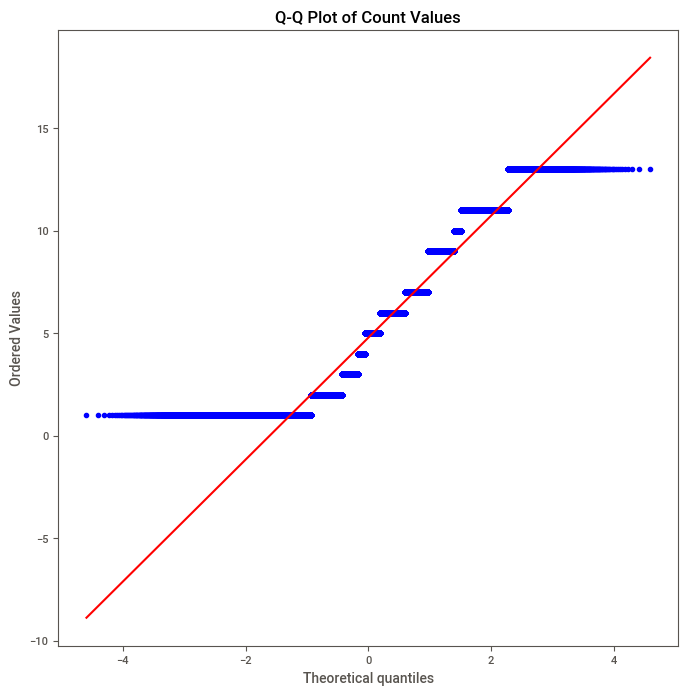

In [34]:
#city_code_hospital
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['City_Code_Hospital'], kde=True)
plt.title('Histogram of Count Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['City_Code_Hospital'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

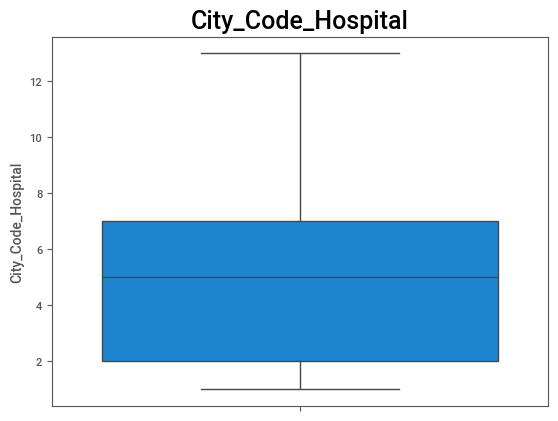

In [35]:
sns.boxplot(data['City_Code_Hospital'])
plt.title('City_Code_Hospital',fontsize=18)
plt.show()

In [36]:
## Hospital_region_code
# value_counts
data.Hospital_region_code.value_counts()

Hospital_region_code
X    133336
Y    122428
Z     62674
Name: count, dtype: int64

* Hospital_region_code contain nomial datatype
* we use one-hot encoder for Hospital_region_code to replace object to numerical datatype

In [37]:
Hospital_region_code=pd.get_dummies(data['Hospital_region_code'],prefix='Hospital_region',drop_first=True)

In [38]:
data=pd.concat([data,Hospital_region_code],axis=1).drop(['Hospital_region_code'],axis=1)

In [39]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z
0,8,3,3,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,False,True
1,2,3,5,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,False,True
2,10,5,1,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,False,False
3,26,2,2,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,True,False
4,26,2,2,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20,False,False
318434,24,1,1,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40,False,False
318435,7,1,4,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20,False,False
318436,11,2,2,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20,True,False


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   Bed_Grade                          318438 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  318438 non-null  float64
 10  Type_of_Admission                  318438 non-null  object 
 11  Severity_of_Illness                3184

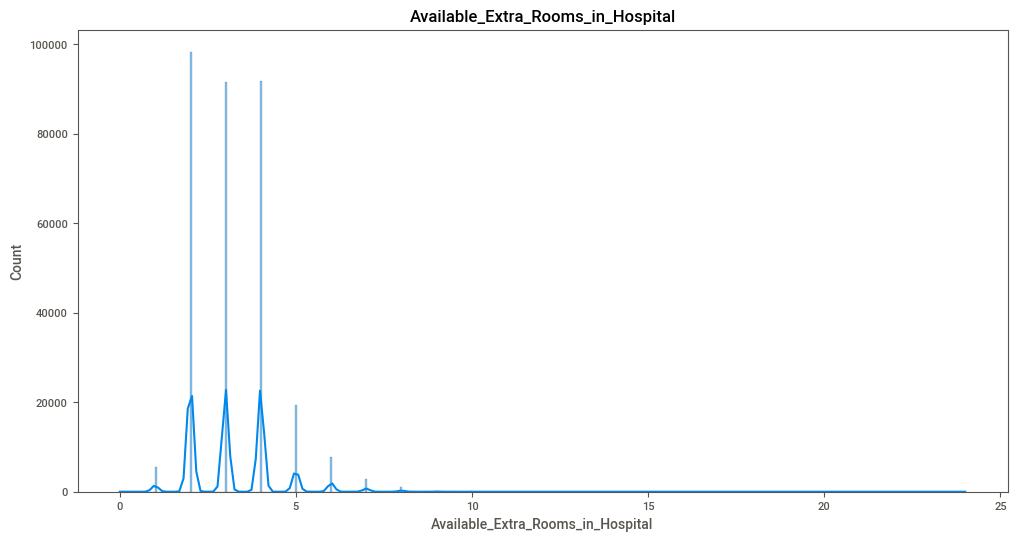

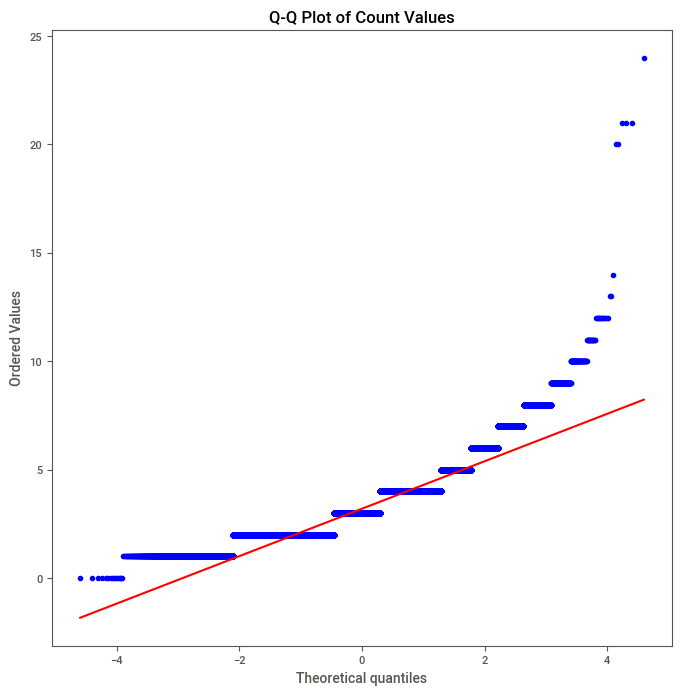

In [41]:
#Available_Extra_Rooms_in_Hospital
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Available_Extra_Rooms_in_Hospital'], kde=True)
plt.title('Available_Extra_Rooms_in_Hospital')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['Available_Extra_Rooms_in_Hospital'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

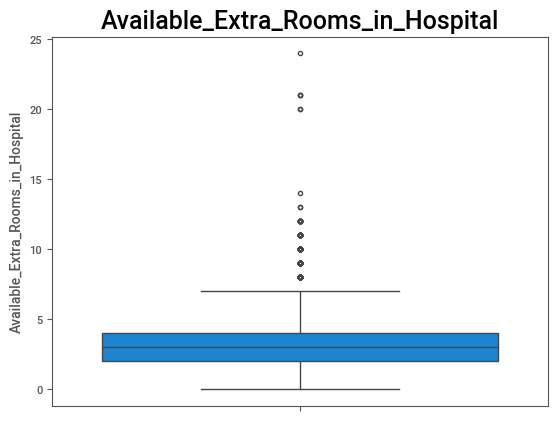

In [42]:
sns.boxplot(data['Available_Extra_Rooms_in_Hospital'])
plt.title('Available_Extra_Rooms_in_Hospital',fontsize=18)
plt.show()

In [43]:
#Handling Outlier
from scipy import stats
IQR=stats.iqr(data.Available_Extra_Rooms_in_Hospital,interpolation='midpoint')
IQR

2.0

In [44]:
Q1=data.Available_Extra_Rooms_in_Hospital.quantile(0.25)
print("Q1:",Q1)
Q3=data.Available_Extra_Rooms_in_Hospital.quantile(0.75)
print("Q3:",Q3)

min_limit=Q1-(1.5*IQR)
print("Min_Lim",min_limit)
max_lim=Q3+(1.5*IQR)
print("Max_Lim",IQR)

Q1: 2.0
Q3: 4.0
Min_Lim -1.0
Max_Lim 2.0


In [45]:
data.loc[data['Available_Extra_Rooms_in_Hospital']>max_lim,'Available_Extra_Rooms_in_Hospital']=np.median(data.Available_Extra_Rooms_in_Hospital)

In [46]:
data.loc[data['Available_Extra_Rooms_in_Hospital']<min_limit]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z


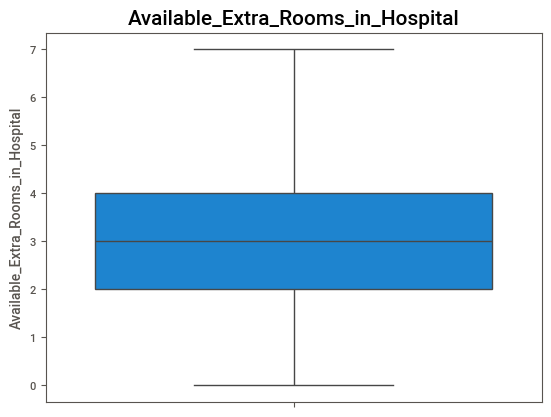

In [47]:
sns.boxplot(data.Available_Extra_Rooms_in_Hospital)
plt.title("Available_Extra_Rooms_in_Hospital",fontsize=15)
plt.show()

In [49]:
#Department
# Unique values
data.Department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [50]:
#Assigning numbers to data
data['Department'].replace({'gynecology':1,'anesthesia':2,'radiotherapy':3,'TB & Chest disease':4,'surgery':5},inplace=True)

In [51]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z
0,8,3,3,3,3,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,False,True
1,2,3,5,2,3,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,False,True
2,10,5,1,2,2,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,False,False
3,26,2,2,2,3,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,True,False
4,26,2,2,2,3,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20,False,False
318434,24,1,1,2,2,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40,False,False
318435,7,1,4,3,1,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20,False,False
318436,11,2,2,3,2,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20,True,False


In [52]:
#Ward Type
# Unique values
data.Ward_Type.unique()

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [53]:
data['Ward_Type'].replace({'R':1,'Q':2,'S':3,'P':4,'T':5,'U':6},inplace=True)

In [54]:
#ward_facility_code
data.Ward_Facility_Code.unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [55]:
data['Ward_Facility_Code'].replace({'F':1,'E':2,'D':3,'C':4,'B':5,'A':6},inplace=True)

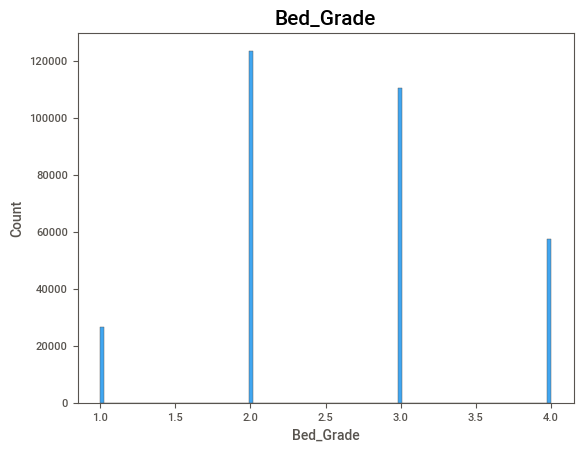

In [56]:
#Bes_Grade
sns.histplot(data['Bed_Grade'])
plt.title('Bed_Grade',fontsize=15)
plt.show()

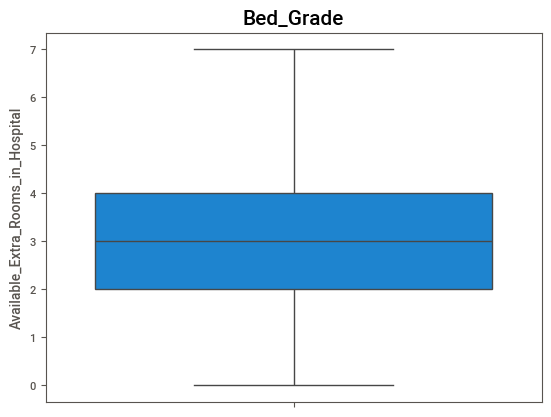

In [57]:
sns.boxplot(data.Available_Extra_Rooms_in_Hospital)
plt.title("Bed_Grade",fontsize=15)
plt.show()

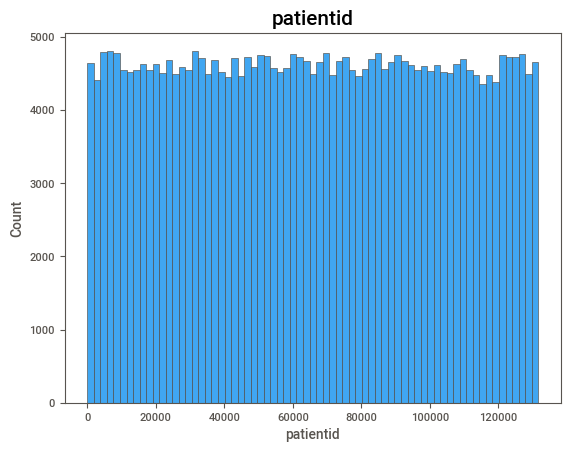

In [59]:
#Patient ID
sns.histplot(data['patientid'])
plt.title('patientid',fontsize=15)
plt.show()

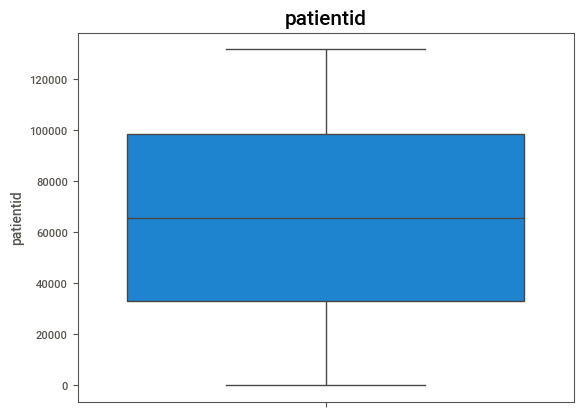

In [60]:
sns.boxplot(data['patientid'])
plt.title('patientid',fontsize=15)
plt.show()

In [61]:
#Reducing memory space
data['patientid']=pd.to_numeric(data.patientid,downcast='integer')

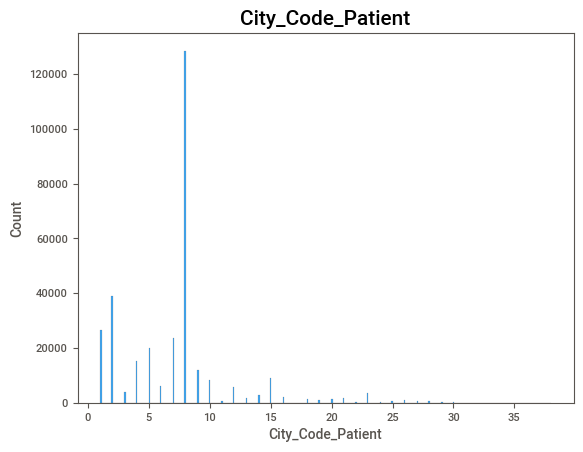

In [62]:
#city code patient
sns.histplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

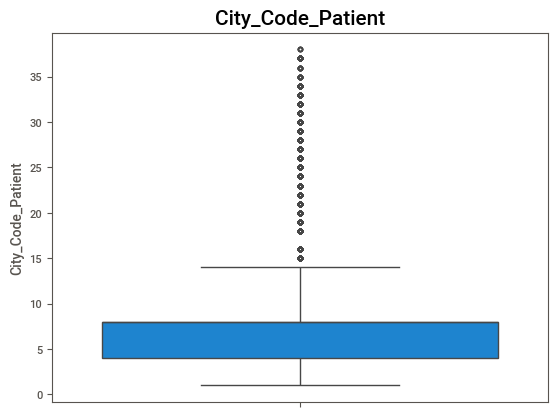

In [63]:
sns.boxplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

In [64]:
#handling Outlier
from scipy import stats
IQR=stats.iqr(data.City_Code_Patient,interpolation='midpoint')
IQR

4.0

In [65]:
Q1=data.City_Code_Patient.quantile(0.25)
print("Q1:",Q1)
Q3=data.City_Code_Patient.quantile(0.75)
print("Q3:",Q3)

max_lim=Q3+(1.5*IQR)
print('max_lim:',max_lim)
min_lim=Q1-(1.5*IQR)
print('min_lim:',min_lim)

Q1: 4.0
Q3: 8.0
max_lim: 14.0
min_lim: -2.0


In [66]:
data.loc[data['City_Code_Patient']>max_lim,'City_Code_Patient']=np.median(data.City_Code_Patient)

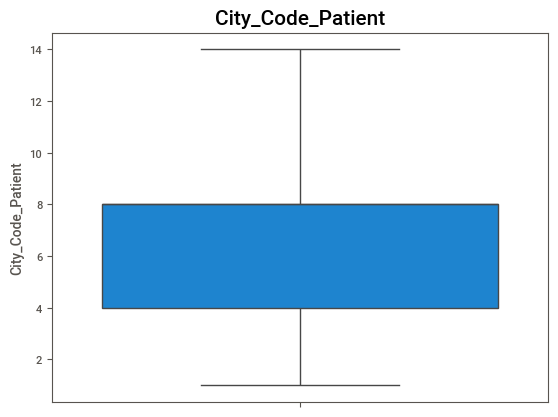

In [67]:
sns.boxplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

In [68]:
#Reducing memory space
data['City_Code_Patient']=pd.to_numeric(data.City_Code_Patient,downcast='float')

In [69]:
#Type_of_admission
data.Type_of_Admission.unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [70]:
#Using one hot encoder to convert into binary format
Type_of_Admission=pd.get_dummies(data.Type_of_Admission,prefix='Admission',drop_first=True)
data=pd.concat([data,Type_of_Admission],axis=1).drop(['Type_of_Admission'],axis=1)
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent
0,8,3,3,3,3,1,1,2.0,31397,7.0,Extreme,2,51-60,4911,0-10,False,True,False,False
1,2,3,5,2,3,3,1,2.0,31397,7.0,Extreme,2,51-60,5954,41-50,False,True,True,False
2,10,5,1,2,2,3,2,2.0,31397,7.0,Extreme,2,51-60,4745,31-40,False,False,True,False
3,26,2,2,2,3,1,3,2.0,31397,7.0,Extreme,2,51-60,7272,41-50,True,False,True,False
4,26,2,2,2,3,3,3,2.0,31397,7.0,Extreme,2,51-60,5558,41-50,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,Moderate,3,41-50,4144,Nov-20,False,False,False,False
318434,24,1,1,2,2,2,2,4.0,325,8.0,Moderate,4,81-90,6699,31-40,False,False,False,True
318435,7,1,4,3,1,1,1,4.0,125235,10.0,Minor,3,71-80,4235,Nov-20,False,False,False,False
318436,11,2,2,3,2,2,3,3.0,91081,8.0,Minor,5,Nov-20,3761,Nov-20,True,False,True,False


In [71]:
#Severity_of_Illness.unique
data.Severity_of_Illness.unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [72]:
#using one hot encoding
Severity_of_Illness=pd.get_dummies(data['Severity_of_Illness'],prefix='Illness',drop_first=True)
data=pd.concat([data,Severity_of_Illness],axis=1).drop(['Severity_of_Illness'],axis=1)

In [73]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
0,8,3,3,3,3,1,1,2.0,31397,7.0,2,51-60,4911,0-10,False,True,False,False,False,False
1,2,3,5,2,3,3,1,2.0,31397,7.0,2,51-60,5954,41-50,False,True,True,False,False,False
2,10,5,1,2,2,3,2,2.0,31397,7.0,2,51-60,4745,31-40,False,False,True,False,False,False
3,26,2,2,2,3,1,3,2.0,31397,7.0,2,51-60,7272,41-50,True,False,True,False,False,False
4,26,2,2,2,3,3,3,2.0,31397,7.0,2,51-60,5558,41-50,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,3,41-50,4144,Nov-20,False,False,False,False,False,True
318434,24,1,1,2,2,2,2,4.0,325,8.0,4,81-90,6699,31-40,False,False,False,True,False,True
318435,7,1,4,3,1,1,1,4.0,125235,10.0,3,71-80,4235,Nov-20,False,False,False,False,True,False
318436,11,2,2,3,2,2,3,3.0,91081,8.0,5,Nov-20,3761,Nov-20,True,False,True,False,True,False


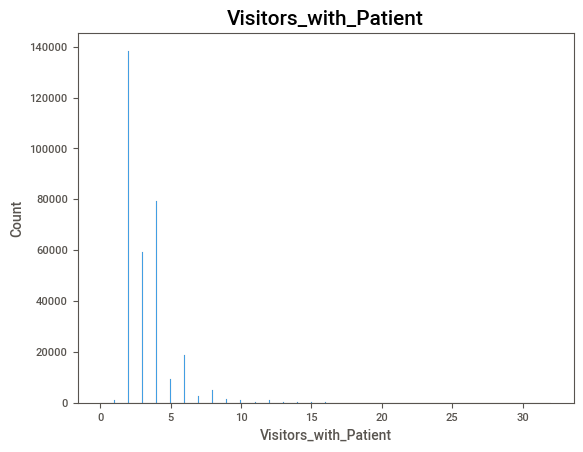

In [74]:
#visitors_with_patient
sns.histplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()

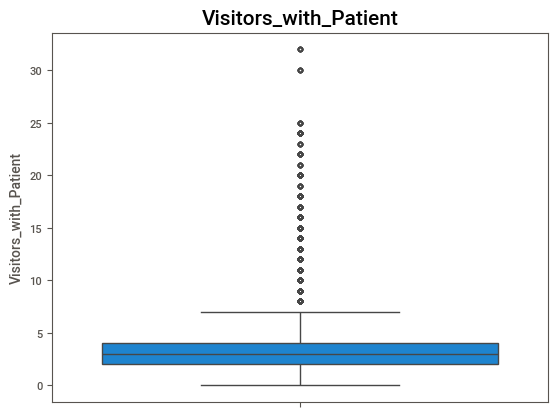

In [75]:
sns.boxplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()

In [76]:
#handling outlier
from scipy import stats
IQR=stats.iqr(data.Visitors_with_Patient,interpolation='midpoint')
IQR

2.0

In [77]:
Q1=data.Visitors_with_Patient.quantile(0.25)
print("Q1:",Q1)
Q3=data.Visitors_with_Patient.quantile(0.75)
print("Q3:",Q3)

min_lim=Q1-(1.5*IQR)
print("Min_lim",min_lim)
max_lim=Q3+(1.5*IQR)
print("Max_lim",max_lim)

Q1: 2.0
Q3: 4.0
Min_lim -1.0
Max_lim 7.0


In [78]:
data.loc[data['Visitors_with_Patient']>max_lim,'Visitors_with_Patient']=np.median(data.Visitors_with_Patient.dropna(axis=0))

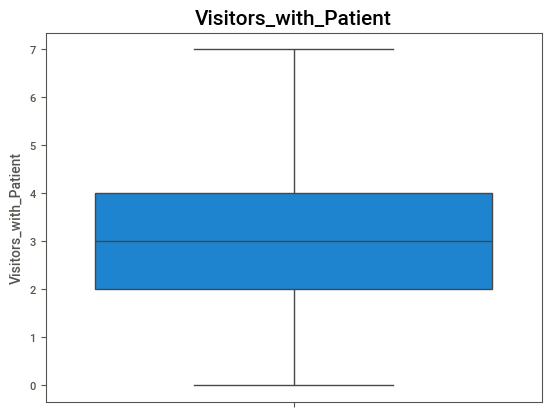

In [79]:
sns.boxplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()

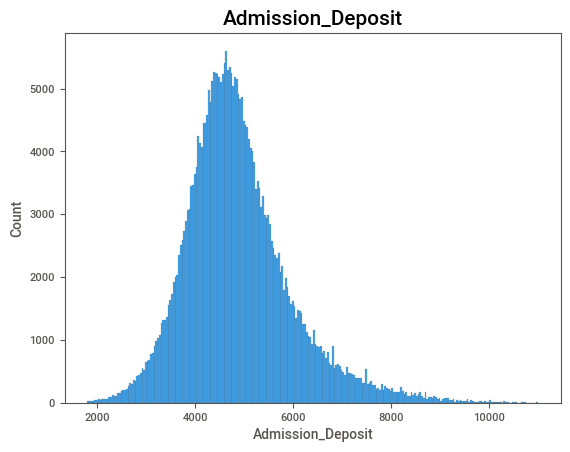

In [80]:
#Admission_deposit
sns.histplot(data['Admission_Deposit'])
plt.title("Admission_Deposit",fontsize=15)
plt.show()

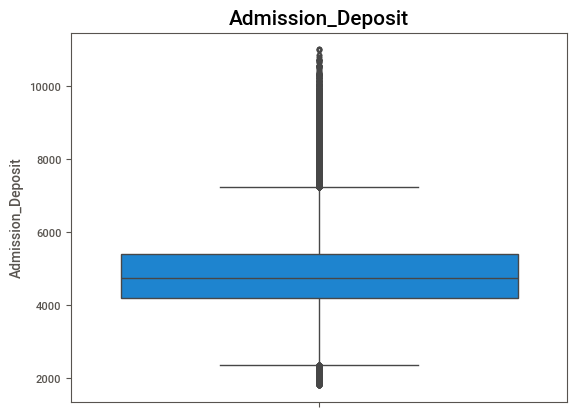

In [81]:
sns.boxplot(data['Admission_Deposit'])
plt.title('Admission_Deposit',fontsize=15)
plt.show()

* we found so many outliers in Admission_Deposit
* We can remove this outlier but it is necessary because some people may stay more days

In [82]:
# Age and Stay
data[['Stay','Age']]

,Stay,Age
0,0-10,51-60
1,41-50,51-60
2,31-40,51-60
3,41-50,51-60
4,41-50,51-60
...,...,...
318433,Nov-20,41-50
318434,31-40,81-90
318435,Nov-20,71-80
318436,Nov-20,Nov-20


In [83]:
def get_categorical_unique(data):
    categorical_columns=[column for column in data.dtypes.index if data.dtypes[column]=='object']
    categorical_uniques={column:data[column].unique() for column in categorical_columns}
    
    return categorical_uniques

In [84]:
get_categorical_unique(data)

{'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        'Nov-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [85]:
categorical_uniques=get_categorical_unique(data)
get_categorical_unique(data)

{'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        'Nov-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [86]:
for column in categorical_uniques:
    categorical_uniques[column]=sorted(categorical_uniques[column])

In [87]:
categorical_uniques

{'Age': ['0-10',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'Nov-20'],
 'Stay': ['0-10',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days',
  'Nov-20']}

### Converting object datatype to numerical

In [88]:
def ordinal_encode(data,uniques):
    for column in uniques:
        data[column]=data[column].apply(lambda x: uniques[column].index(x))
ordinal_encode(data,categorical_uniques)

In [89]:
data.dtypes

Hospital_code                           int8
Hospital_type_code                     int64
City_Code_Hospital                     int64
Available_Extra_Rooms_in_Hospital       int8
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed_Grade                            float32
patientid                              int32
City_Code_Patient                    float32
Visitors_with_Patient                  int64
Age                                    int64
Admission_Deposit                      int64
Stay                                   int64
Hospital_region_Y                       bool
Hospital_region_Z                       bool
Admission_Trauma                        bool
Admission_Urgent                        bool
Illness_Minor                           bool
Illness_Moderate                        bool
dtype: object

In [90]:
data['Age']=pd.to_numeric(data.Age,downcast='integer')
data['Stay']=pd.to_numeric(data.Stay,downcast='integer')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int8   
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available_Extra_Rooms_in_Hospital  318438 non-null  int8   
 4   Department                         318438 non-null  int64  
 5   Ward_Type                          318438 non-null  int64  
 6   Ward_Facility_Code                 318438 non-null  int64  
 7   Bed_Grade                          318438 non-null  float32
 8   patientid                          318438 non-null  int32  
 9   City_Code_Patient                  318438 non-null  float32
 10  Visitors_with_Patient              318438 non-null  int64  
 11  Age                                3184

# Feature Selection

In [92]:
data.corr()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
Hospital_code,1.000000,0.039449,0.128294,-0.064638,0.014823,0.012135,0.132347,-0.013948,0.002291,-0.005624,-0.030385,0.010138,0.045446,-0.012704,0.199212,-0.250500,-0.002291,-0.012086,-0.026442,0.005939
Hospital_type_code,0.039449,1.000000,-0.000839,-0.102539,-0.024754,0.223661,0.265768,0.018642,-0.003010,0.047532,-0.040882,0.006483,0.025341,-0.010271,0.015765,0.244889,0.046488,0.044452,-0.004195,-0.001701
City_Code_Hospital,0.128294,-0.000839,1.000000,-0.040769,-0.010848,-0.040735,0.100474,-0.049248,0.000750,-0.021897,0.021167,0.008408,-0.034455,0.020320,0.216058,-0.124312,-0.038472,0.011837,-0.026229,0.011690
Available_Extra_Rooms_in_Hospital,-0.064638,-0.102539,-0.040769,1.000000,-0.091781,-0.075760,-0.053154,-0.120026,0.000897,-0.024005,0.129325,-0.138978,-0.141784,-0.031618,-0.014122,-0.000300,-0.048702,0.014017,-0.004370,0.015066
Department,0.014823,-0.024754,-0.010848,-0.091781,1.000000,0.013891,-0.014470,0.053575,0.005300,0.011024,-0.006590,0.080078,0.084338,0.015486,0.004679,-0.026300,0.015503,-0.013569,-0.037623,0.015419
Ward_Type,0.012135,0.223661,-0.040735,-0.075760,0.013891,1.000000,0.217726,-0.019193,0.000511,0.104941,0.078980,0.022874,-0.023761,0.016718,0.211891,0.055015,-0.053976,-0.006604,-0.016778,-0.002232
Ward_Facility_Code,0.132347,0.265768,0.100474,-0.053154,-0.014470,0.217726,1.000000,-0.075984,-0.001923,0.216534,-0.008746,0.004863,0.023057,0.001536,0.538828,0.150495,-0.084537,0.017306,-0.027433,0.000773
Bed_Grade,-0.013948,0.018642,-0.049248,-0.120026,0.053575,-0.019193,-0.075984,1.000000,0.001638,-0.024438,0.018183,0.058116,0.073779,0.093728,-0.101365,0.021621,0.106135,0.047094,0.254384,-0.074921
patientid,0.002291,-0.003010,0.000750,0.000897,0.005300,0.000511,-0.001923,0.001638,1.000000,0.001116,0.004885,-0.001215,-0.000877,0.001401,0.002157,-0.003291,-0.003095,0.004546,0.003805,0.001735
City_Code_Patient,-0.005624,0.047532,-0.021897,-0.024005,0.011024,0.104941,0.216534,-0.024438,0.001116,1.000000,0.008020,0.024325,0.039697,0.002797,0.218506,0.047740,-0.053223,-0.006569,0.000867,-0.011577


Text(0.5, 1.0, 'Heat map showing correlation between the feature ')

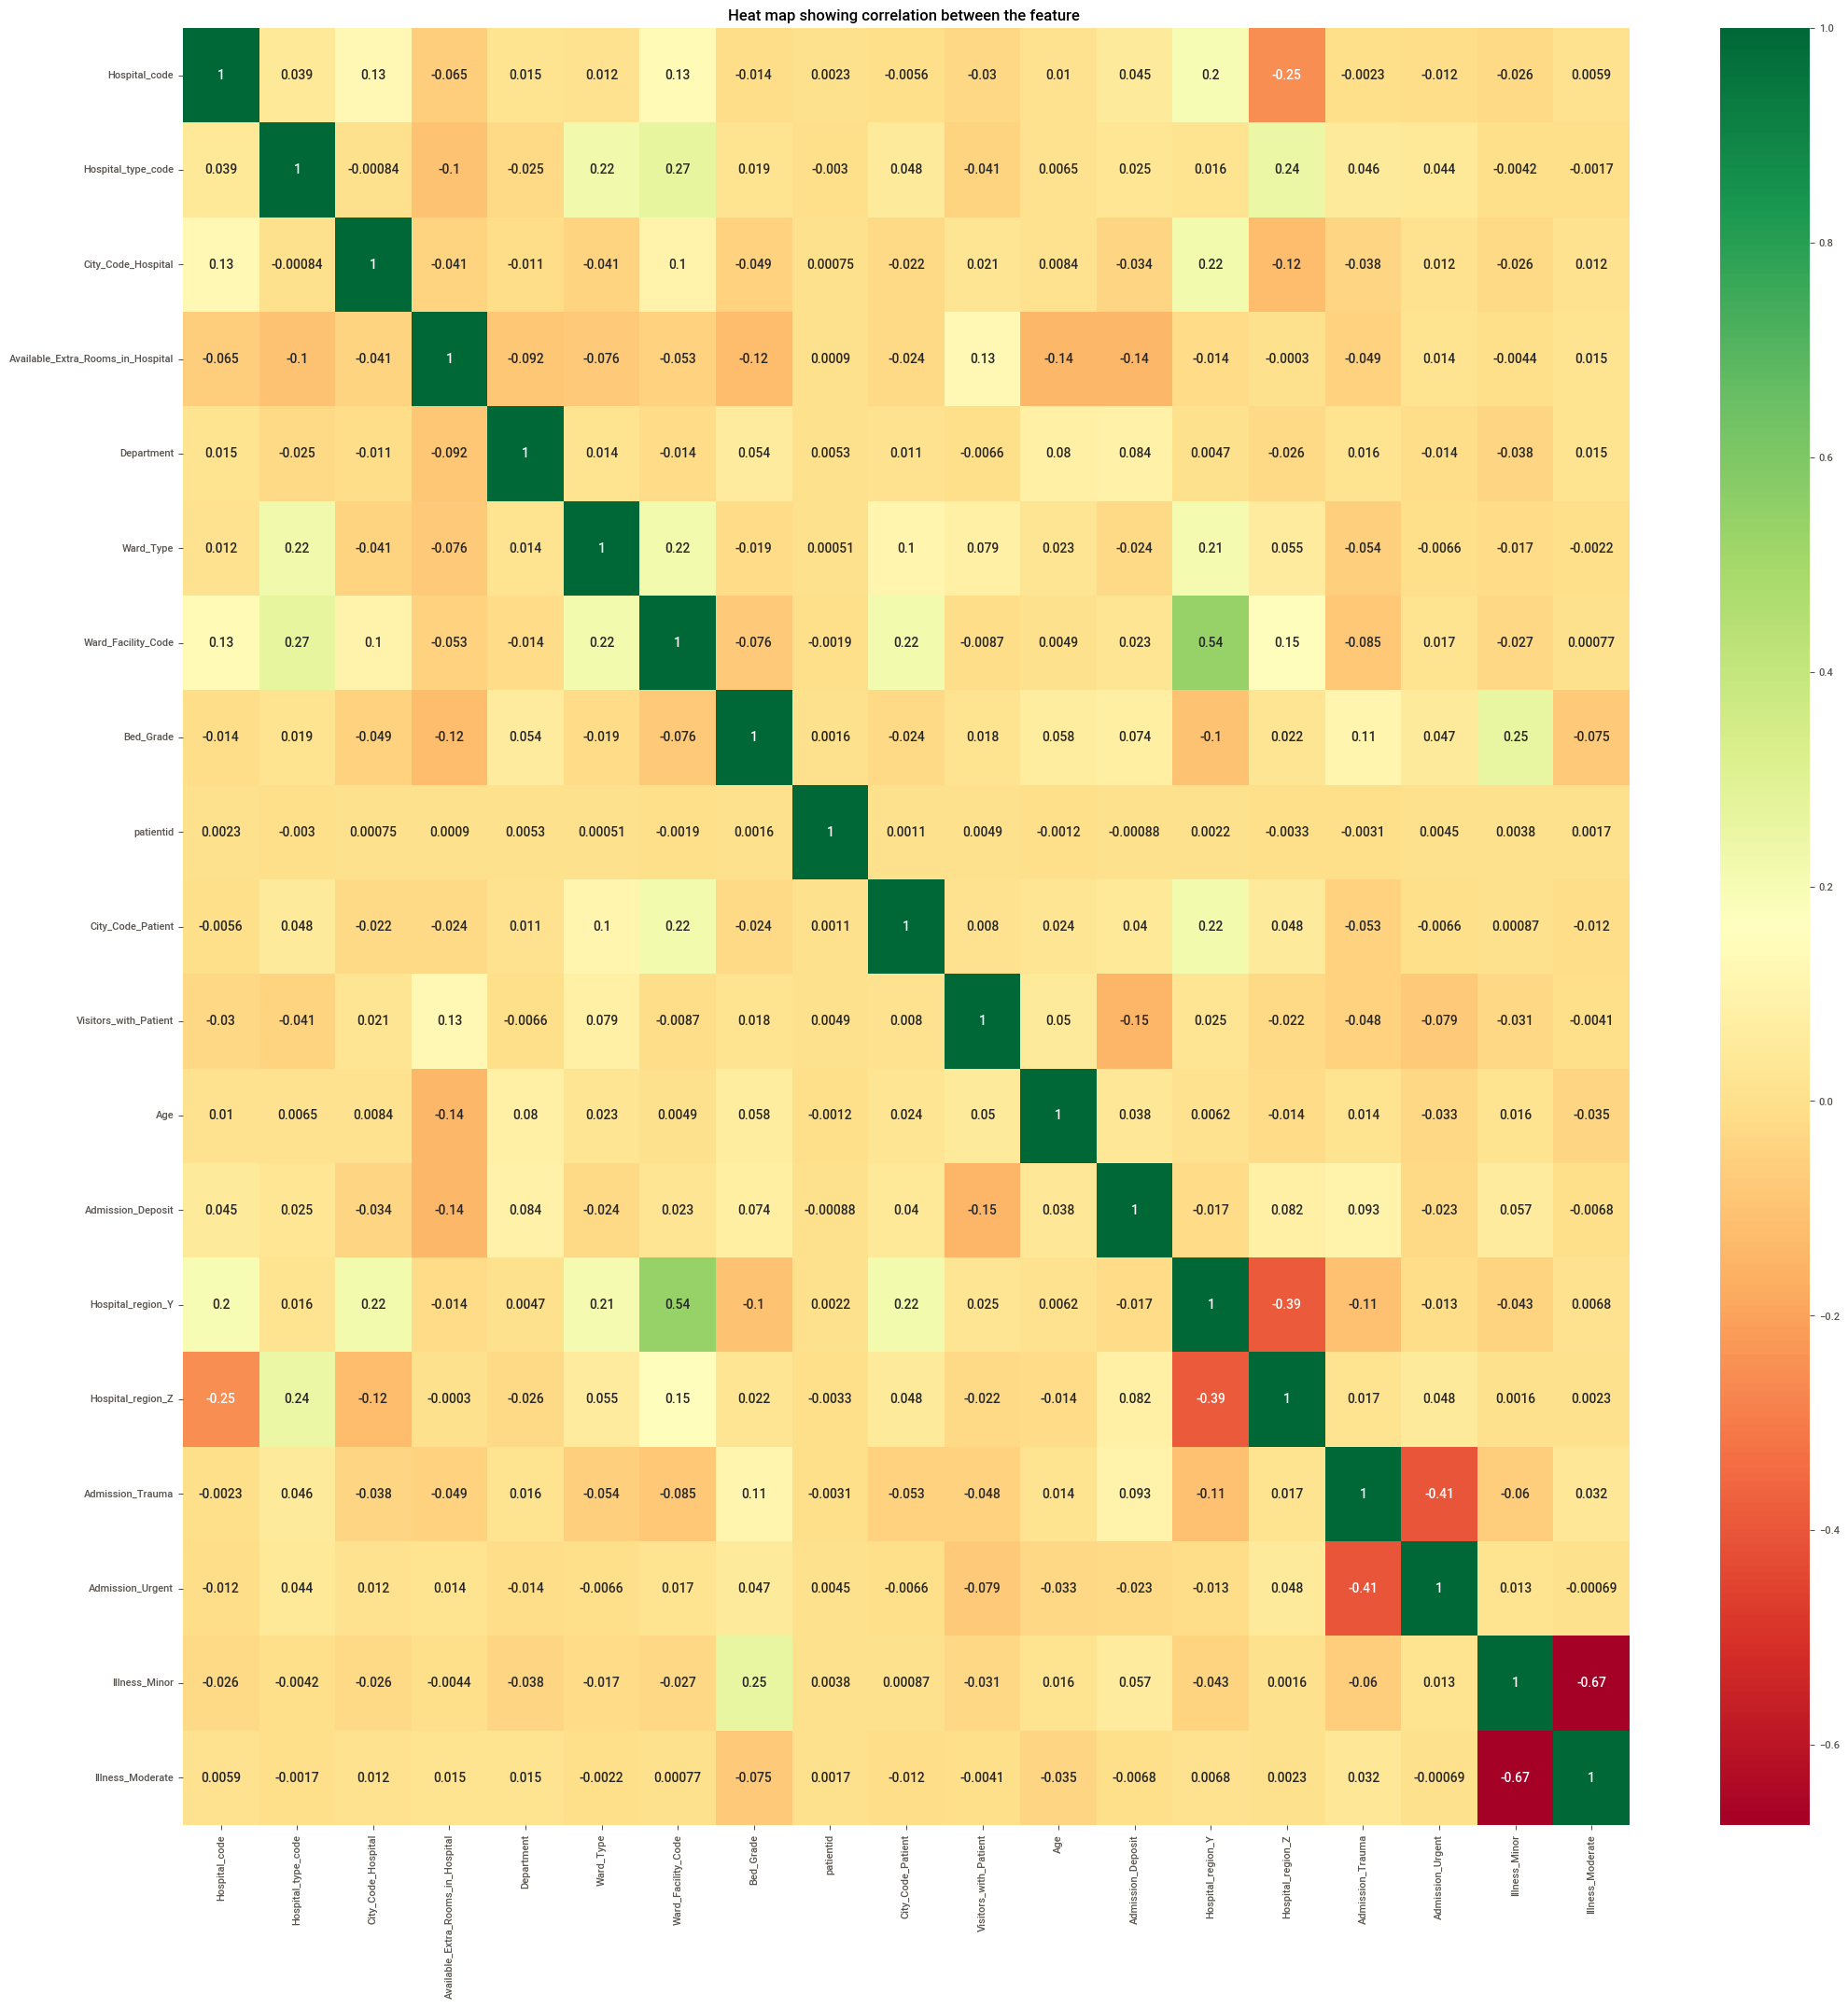

In [93]:
plt.figure(figsize=(25,25))
sns.heatmap(data.drop('Stay',axis=1).corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing correlation between the feature ")

In [94]:
#dropping duplicates
data.drop_duplicates(inplace=True)

# Random Forest Regressor

        Hospital_code  Hospital_type_code  City_Code_Hospital  \
0                   8                   3                   3   
1                   2                   3                   5   
2                  10                   5                   1   
3                  26                   2                   2   
4                  26                   2                   2   
...               ...                 ...                 ...   
318433              6                   1                   6   
318434             24                   1                   1   
318435              7                   1                   4   
318436             11                   2                   2   
318437             19                   1                   7   

        Available_Extra_Rooms_in_Hospital  Department  Ward_Type  \
0                                       3           3          1   
1                                       2           3          3   
2              

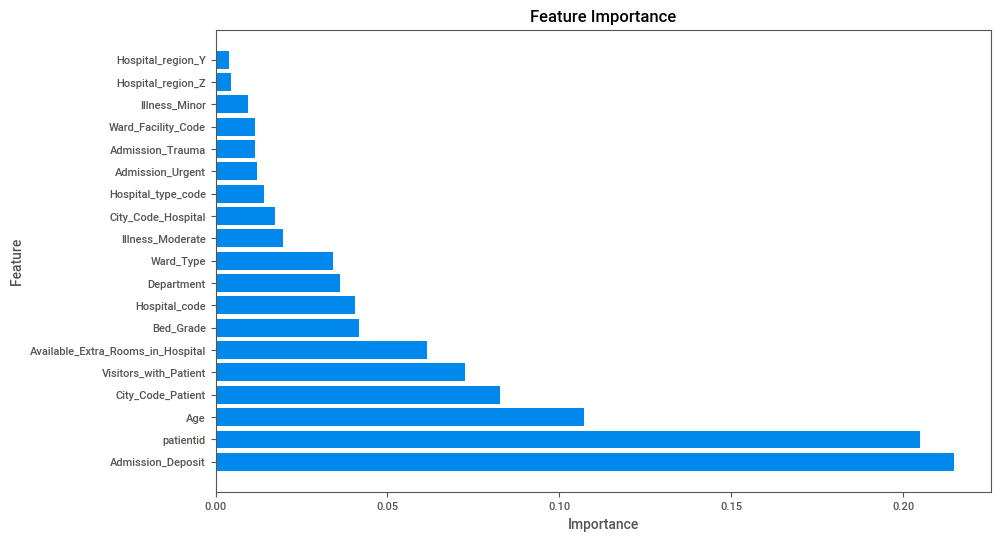

In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a Dataframe named 'data'
# Extract feature and target variable
feature=data.drop('Stay',axis=1)
target=data['Stay']

# convert categorical variable to dummy/indicator variable (if needed)
feature=pd.get_dummies(feature)
print(feature)
# initialize a Random Forest Regressor
RF1_model=RandomForestClassifier(random_state=42)
RF1_model.fit(feature,target)

# Get feature importance
feature_importance=RF1_model.feature_importances_

#create a Dataframe to display feature importance
feature_importances_data=pd.DataFrame({
    'Feature':feature.columns,
    'Importance':feature_importance
})

# sort the DataFrame by importance in descending order
feature_importances_data=feature_importances_data.sort_values(by='Importance',ascending=False)

# Display the feature importance Dataframe
print(feature_importances_data)

#plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importances_data['Feature'],feature_importances_data['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

* Here we used Random Feature classifier
* We got how many features are very needed for model prediction

In [96]:
#unwanted
data1=data.drop(['Hospital_region_Z','Hospital_region_Z',],axis=1)

## Model Creation

In [97]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [98]:
# drop traget columns for x variable
# select target variable for y variable
x=data1.drop('Stay',axis=1)
y=data1.Stay

In [99]:
# Balancing the Data
from collections import Counter
from imblearn.over_sampling import SMOTE

sm=SMOTE()
print(Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print(Counter(y_sm))

Counter({1: 87488, 10: 78135, 2: 55152, 4: 35000, 0: 23599, 3: 11743, 6: 10246, 9: 6666, 7: 4836, 8: 2764, 5: 2744})
Counter({0: 87488, 3: 87488, 2: 87488, 10: 87488, 4: 87488, 1: 87488, 6: 87488, 9: 87488, 7: 87488, 5: 87488, 8: 87488})


In [100]:
### Dimensionality Reduction:

In [101]:
# split train and test data for model training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(254698, 18)
(63675, 18)
(254698,)
(63675,)


# Model Building

# 1)Logistic Legression

In [102]:
from sklearn.feature_selection import SelectKBest,f_classif
k=17
selector=SelectKBest(f_classif,k=k)
x_train_selected=selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

In [103]:
x_test_selected

array([[26.,  2.,  2., ...,  0.,  0.,  0.],
       [11.,  2.,  2., ...,  0.,  0.,  0.],
       [26.,  2.,  2., ...,  0.,  1.,  0.],
       ...,
       [28.,  2., 11., ...,  0.,  0.,  0.],
       [13.,  1.,  5., ...,  0.,  1.,  0.],
       [27.,  1.,  7., ...,  1.,  1.,  0.]])

In [104]:
x_train_selected

array([[32.,  6.,  9., ...,  0.,  0.,  0.],
       [14.,  1.,  1., ...,  0.,  1.,  0.],
       [23.,  1.,  6., ...,  0.,  0.,  1.],
       ...,
       [23.,  1.,  6., ...,  0.,  0.,  1.],
       [ 9.,  4.,  5., ...,  1.,  0.,  1.],
       [14.,  1.,  1., ...,  0.,  0.,  1.]])

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix
# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model1=LogisticRegression()
model1.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_LR=model1.predict(X_test_scaled)
Y_train_LR=model1.predict(X_train_scaled)

## Model Evaluation

In [106]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_LR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_LR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_LR, Y_train))

Confusion matrix:
[[ 55090     51]
 [ 36009 112608]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     55141
         1.0       1.00      0.76      0.86    148617

    accuracy                           0.82    203758
   macro avg       0.80      0.88      0.81    203758
weighted avg       0.89      0.82      0.83    203758


Accuracy Score:
0.823025353605748


In [107]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_LR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_LR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_LR, Y_train))

Confusion matrix:
[[ 55090     51]
 [ 36009 112608]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     55141
         1.0       1.00      0.76      0.86    148617

    accuracy                           0.82    203758
   macro avg       0.80      0.88      0.81    203758
weighted avg       0.89      0.82      0.83    203758


Accuracy Score:
0.823025353605748


* Logistic regression is used for classifiation problems.
* In logistic regression training accuracy is 82% and testing accuracy is 82% 

# 2) Decision Tree

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model2=DecisionTreeClassifier()
model2.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_tree=model2.predict(X_test_scaled)
Y_train_tree=model2.predict(X_train_scaled)

In [109]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_tree,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_tree, Y_test))

print("\nAccuracy Score:")
print(accuracy_score(Y_test_tree, Y_test))

Confusion matrix:
[[16974  6580]
 [ 6028 21358]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     23554
         1.0       0.76      0.78      0.77     27386

    accuracy                           0.75     50940
   macro avg       0.75      0.75      0.75     50940
weighted avg       0.75      0.75      0.75     50940


Accuracy Score:
0.7524931291715744


In [110]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_tree,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_tree, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_tree, Y_train))

Confusion matrix:
[[ 91099     42]
 [     0 112617]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91141
         1.0       1.00      1.00      1.00    112617

    accuracy                           1.00    203758
   macro avg       1.00      1.00      1.00    203758
weighted avg       1.00      1.00      1.00    203758


Accuracy Score:
0.999793873124


* Decision tree is used for both classification and regrssion problems.
* In Decision tree, training accuracy is 99% and testing accuracy is 75% therefore it is overfit because traing accuracy is high and testing accuracy is low.

# Knn- K Nearest Neighbours

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=KNeighborsClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_Knn=model4.predict(X_test_scaled)
Y_train_Knn=model4.predict(X_train_scaled)

In [112]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_Knn,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_Knn, Y_test))

print("\nAccuracy Score:")
KNN=accuracy_score(Y_test_Knn, Y_test)
print(KNN)

Confusion matrix:
[[15738  2296]
 [ 7264 25642]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.87      0.77     18034
         1.0       0.92      0.78      0.84     32906

    accuracy                           0.81     50940
   macro avg       0.80      0.83      0.80     50940
weighted avg       0.84      0.81      0.82     50940


Accuracy Score:
0.81232822928936


In [113]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_Knn,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_Knn, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_Knn, Y_train))

Confusion matrix:
[[ 67329   5049]
 [ 23770 107610]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82     72378
         1.0       0.96      0.82      0.88    131380

    accuracy                           0.86    203758
   macro avg       0.85      0.87      0.85    203758
weighted avg       0.88      0.86      0.86    203758


Accuracy Score:
0.8585626085846936


* KNN is used for both classification and regrssion problems.
* In KNN, training accuracy is 85% and testing accuracy is 81%.

# Gradient Boosting

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=GradientBoostingClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_GR=model4.predict(X_test_scaled)
Y_train_GR=model4.predict(X_train_scaled)

In [115]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_GR,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_GR,Y_test))

print("\nAccuracy Score:")
GD=accuracy_score(Y_test_GR,Y_test)
print(GD)

Confusion matrix:
[[15465   727]
 [ 7537 27211]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79     16192
         1.0       0.97      0.78      0.87     34748

    accuracy                           0.84     50940
   macro avg       0.82      0.87      0.83     50940
weighted avg       0.88      0.84      0.84     50940


Accuracy Score:
0.8377699254024342


In [116]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_GR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_GR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_GR, Y_train))

Confusion matrix:
[[ 61339   2793]
 [ 29760 109866]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79     64132
         1.0       0.98      0.79      0.87    139626

    accuracy                           0.84    203758
   macro avg       0.82      0.87      0.83    203758
weighted avg       0.88      0.84      0.85    203758


Accuracy Score:
0.8402369477517447


* Gradient boosting is used for the combination of high predictive accuracy, flexibility, robustness, interpretability, and availability of efficient implementations.
* In Gradient boosting ,training accuracy is 84% and testing accuracy is 83%.

## Hyper parameter tuning on Decision tree 

### Grid SearchCV

In [137]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is loaded in X_train, X_test, y_train, y_test
# X_train.shape -> (254698, 18)
# X_test.shape -> (63675, 18)
# y_train.shape -> (254698,)
# y_test.shape -> (63675,)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_dist = {
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # The number of features to consider for the best split
    'splitter': ['best', 'random'],  # Strategy to choose the split at each node
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to test
    scoring='accuracy',  # Evaluation metric (accuracy here)
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Print progress during fitting
    random_state=42,
    n_jobs=-1,  # Use all CPU cores for parallel processing
    pre_dispatch='2*n_jobs',  # Pre-dispatch jobs for parallel processing
)

# Fit the RandomizedSearchCV on the training set
random_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters found: ", random_search.best_params_)
print("Best Cross-Validation Accuracy: ", random_search.best_score_)

# Predict with the best model found
best_dt = random_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test set Accuracy: ", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
Best Cross-Validation Accuracy:  0.9428571428571428
Test set Accuracy:  1.0


# Comparisions:

In logistic regression training accuracy is 82% and testing accuracy is 82% 

In Decision tree, training accuracy is 99% and testing accuracy is 75%

In KNN, training accuracy is 85% and testing accuracy is 81%.

In GridSearchCV on decision tree, training accuracy is 84% and testing accuracy is 83%.

From this we can say that ensemble method and GridSearchCV on decision tree yields highest accuracy on training as well as testing data.

In logistic regression training accuracy is 82% and testing accuracy is 82%

In Decision tree, training accuracy is 99% and testing accuracy is 75%

In KNN, training accuracy is 85% and testing accuracy is 81%.

In ensemble methods ,training accuracy is 88% and testing accuracy is 83%

In GridSearchCV on decision tree, training accuracy is 94% and testing accuracy is 100%.

From this we can say that ensemble method and RandomizedSearchCV on decision tree yields highest accuracy on training as well as testing data.